In [31]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords
import collections
import liwc
from collections import Counter

In [32]:
df_train = pd.read_csv("mbti_1.csv")
df_train.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [33]:
df_train['posts'].astype(str)
df_train['clean_text'] = df_train['posts'].str.replace('http\S+|www.\S+', '', case=False) #Removing urls
df_train['clean_text'] = df_train['clean_text'].str.replace('[^A-Za-z0-9]+', ' ') #Removing Punctuations, Numbers, and Special Character 
df_train['clean_text'] = df_train['clean_text'].map(lambda x: x if type(x)!=str else x.lower()) #lowercase
df_train['clean_text'].dropna() #drop NaN values

df_train.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15384\883371522.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['clean_text'] = df_train['posts'].str.replace('http\S+|www.\S+', '', case=False) #Removing urls
C:\Users\HP\AppData\Local\Temp\ipykernel_15384\883371522.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['clean_text'] = df_train['clean_text'].str.replace('[^A-Za-z0-9]+', ' ') #Removing Punctuations, Numbers, and Special Character


,type,posts,clean_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top ten pla...
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i know that s ...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the othe...
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconcepti...


In [34]:
split_data = df_train['clean_text'].str.split(" ")
df_train['tokens'] = split_data
nan_value = float("NaN")
df_train.replace("", nan_value, inplace=True)
df_train.dropna(subset = ["tokens"], inplace=True)
df_train.head()

,type,posts,clean_text,tokens
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top ten pla...,"[, and, intj, moments, sportscenter, not, top,..."
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...,"[, i, m, finding, the, lack, of, me, in, these..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i know that s ...,"[, good, one, course, to, which, i, say, i, kn..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the othe...,"[, dear, intp, i, enjoyed, our, conversation, ..."
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconcepti...,"[, you, re, fired, that, s, another, silly, mi..."


In [38]:
parse, category_names = liwc.load_token_parser('LIWC2015_Dictionary.dic')


In [39]:
# LIWC features extraction

#LIWC Features Extraction
liwc =[]
for item in df_train.tokens:
    liwc_counts = list(collections.Counter(category for token in item for category in parse(token)).items())
    liwc.append(liwc_counts)
liwc_ = np.array(liwc)
# print for 1st token
print(liwc_[0])
# plot for 1st token using seaborn
# import seaborn as sns
# sns.set(style="whitegrid")
# sns.barplot(x=[i[0] for i in liwc_[0]], y=[i[1] for i in liwc_[0]])
# plt.xticks(rotation=90)
# plt.show()

# plt.bar(*zip(*liwc_[0]))
# plt.xticks(rotation=90)
# plt.show()

# for item in df_train.tokens:
#     gettysburg_counts = list(collections.Counter(category for token in item for category in parse(token) if category == 'family (Family)').items())
#     liwc.append(gettysburg_counts)
# liwc_ = np.array(liwc)

[('function', 279), ('conj', 30), ('relativ', 92), ('time', 36), ('leisure', 18), ('negate', 5), ('cogproc', 63), ('differ', 11), ('adj', 33), ('compare', 21), ('drives', 41), ('achiev', 12), ('power', 12), ('space', 49), ('number', 7), ('affect', 32), ('posemo', 24), ('pronoun', 76), ('ipron', 29), ('interrog', 9), ('auxverb', 27), ('verb', 62), ('focuspresent', 38), ('focuspast', 15), ('article', 40), ('quant', 21), ('tentat', 17), ('bio', 11), ('health', 8), ('cause', 9), ('motion', 8), ('percept', 15), ('prep', 84), ('ppron', 47), ('you', 17), ('social', 55), ('focusfuture', 4), ('i', 23), ('friend', 2), ('affiliation', 16), ('shehe', 3), ('male', 2), ('certain', 15), ('death', 2), ('negemo', 8), ('sad', 5), ('hear', 5), ('anx', 3), ('adverb', 26), ('reward', 9), ('insight', 10), ('feel', 2), ('body', 2), ('they', 4), ('work', 11), ('discrep', 5), ('informal', 13), ('assent', 3), ('see', 6), ('netspeak', 9), ('female', 2), ('nonflu', 2), ('home', 4), ('ingest', 1), ('family', 1), (

C:\Users\HP\AppData\Local\Temp\ipykernel_15384\4277583130.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  liwc_ = np.array(liwc)


In [ ]:
df_train['liwc'] = liwc_
# df_train.head()
# drop function categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'function'])
# drop pronoun categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'pronoun'])
# drop ppron categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'ppron'])
# drop i categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'i'])
# drop we categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'we'])
# drop you categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'you'])
# drop shehe categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'shehe'])
# drop they categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'they'])
# drop ipron categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'ipron'])
# drop article categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'article'])
# drop auxverb categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'auxverb'])
# drop adverb categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'adverb'])
# drop preps categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'prep'])
# drop conj categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'conj'])
# drop negate categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'negate'])
# drop quant categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'quant'])
# drop verb categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'verb'])
# drop adj categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'adj'])
# drop compare categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'compare'])
# drop interrog categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'interrog'])
# drop number categorie from liwc_ column
df_train['liwc'] = df_train['liwc'].apply(lambda x: [i for i in x if i[0] != 'number'])





df_train['liwc'][0]

[('relativ', 92),
 ('time', 36),
 ('leisure', 18),
 ('cogproc', 63),
 ('differ', 11),
 ('drives', 41),
 ('achiev', 12),
 ('power', 12),
 ('space', 49),
 ('affect', 32),
 ('posemo', 24),
 ('focuspresent', 38),
 ('focuspast', 15),
 ('tentat', 17),
 ('bio', 11),
 ('health', 8),
 ('cause', 9),
 ('motion', 8),
 ('percept', 15),
 ('social', 55),
 ('focusfuture', 4),
 ('friend', 2),
 ('affiliation', 16),
 ('male', 2),
 ('certain', 15),
 ('death', 2),
 ('negemo', 8),
 ('sad', 5),
 ('hear', 5),
 ('anx', 3),
 ('reward', 9),
 ('insight', 10),
 ('feel', 2),
 ('body', 2),
 ('work', 11),
 ('discrep', 5),
 ('informal', 13),
 ('assent', 3),
 ('see', 6),
 ('netspeak', 9),
 ('female', 2),
 ('nonflu', 2),
 ('home', 4),
 ('ingest', 1),
 ('family', 1),
 ('risk', 2)]

In [ ]:
type(liwc_[0]) == type(df_train['liwc'][0])

True

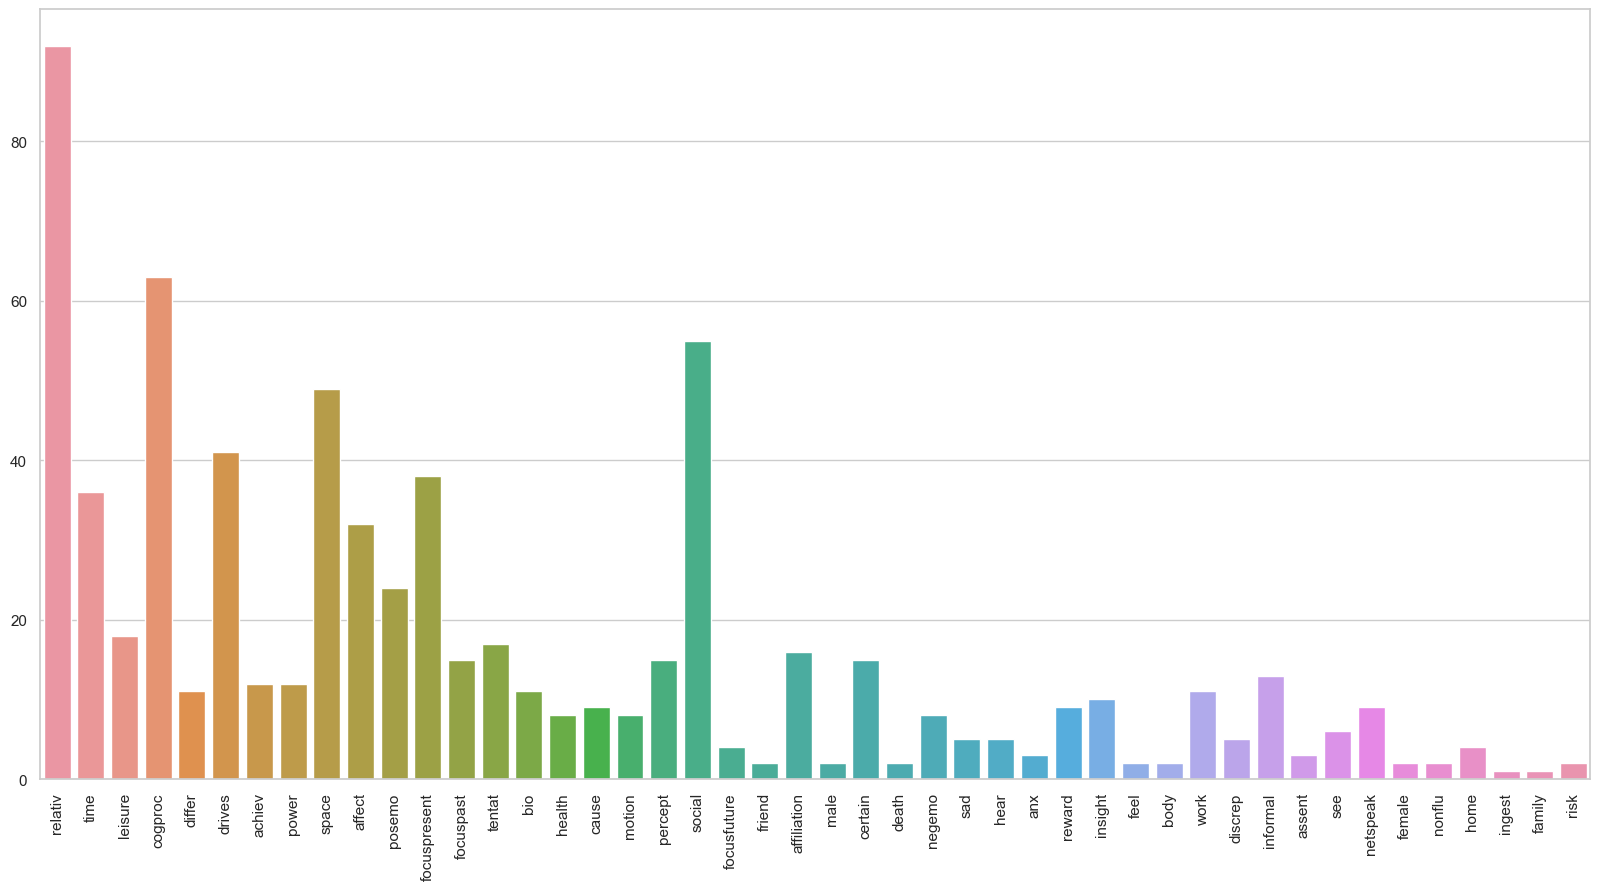

In [ ]:
# plot for 1st token using seaborn
import seaborn as sns

# make space for x axis labels
plt.figure(figsize=(20,10))

sns.set(style="whitegrid")
# use df_train['liwc'] instead of liwc_ to plot all categories

sns.barplot(x=[i[0] for i in df_train['liwc'][0]], y=[i[1] for i in df_train['liwc'][0]])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# the liwc_ column is a list of tuples
# like this 
# [('relativ', 92),
#  ('time', 36),
#  ('leisure', 18),
#  ('cogproc', 63),
#  ('differ', 11),
#  ('drives', 41),
#  ('achiev', 12),
#  ('power', 12),
#  ('space', 49),
#  ('affect', 32),
#  ('posemo', 24),
#  ('focuspresent', 38),
#  ('focuspast', 15),
#  ('tentat', 17),
#  ('bio', 11),
#  ('health', 8),
#  ('cause', 9),
#  ('motion', 8),
#  ('percept', 15),
#  ('social', 55),
#  ('focusfuture', 4),
#  ('friend', 2),
#  ('affiliation', 16),
#  ('male', 2),
#  ('certain', 15),
# ...
#  ('nonflu', 2),
#  ('home', 4),
#  ('ingest', 1),
#  ('family', 1),
#  ('risk', 2)]
# plot for each row in liwc_ column
print('Plotting for each row in liwc_ column')

# find all unique categories
categories = []
for i in df_train['liwc']:
    for j in i:
        categories.append(j[0])
categories = list(set(categories))
categories




Plotting for each row in liwc_ column


52

In [ ]:
# create a new dataframe with all categories as columns
df_liwc = pd.DataFrame(columns=categories)
df_liwc
# fill the new dataframe with values
for i in range(len(df_train['liwc'])):
    for j in df_train['liwc'][i]:
        df_liwc.loc[i,j[0]] = j[1]
df_liwc
# merge the new dataframe with the original dataframe


,work,anx,home,percept,achiev,affect,posemo,focusfuture,tentat,informal,...,netspeak,insight,body,see,male,relig,space,drives,power,swear
0,11,3,4,15,12,32,24,4,17,13,...,9,10,2,6,2,NaN,49,41,12,NaN
1,21,3,NaN,25,18,76,44,10,29,10,...,4,31,8,7,11,3,78,89,25,2
2,12,3,1,23,16,67,46,10,30,15,...,4,28,6,9,1,3,46,57,12,NaN
3,19,2,3,38,11,58,39,8,52,19,...,11,50,4,8,4,4,56,63,17,3
4,22,1,1,22,20,70,41,11,33,20,...,7,37,10,4,16,1,47,84,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,16,3,NaN,33,14,55,34,7,40,14,...,1,34,4,11,9,4,37,36,14,6
8671,35,1,6,28,12,100,87,13,60,24,...,7,55,5,11,4,1,62,73,15,1
8672,16,NaN,3,22,20,63,39,11,19,19,...,7,35,7,10,27,2,43,73,19,3
8673,42,5,1,37,20,107,78,11,79,16,...,1,74,2,9,9,1,90,97,34,2


In [43]:
df_train = pd.concat([df_train, df_liwc], axis=1)
df_train



,type,posts,clean_text,tokens,work,anx,home,percept,achiev,affect,...,netspeak,insight,body,see,male,relig,space,drives,power,swear
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top ten pla...,"[, and, intj, moments, sportscenter, not, top,...",11,3,4,15,12,32,...,9,10,2,6,2,NaN,49,41,12,NaN
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...,"[, i, m, finding, the, lack, of, me, in, these...",21,3,NaN,25,18,76,...,4,31,8,7,11,3,78,89,25,2
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i know that s ...,"[, good, one, course, to, which, i, say, i, kn...",12,3,1,23,16,67,...,4,28,6,9,1,3,46,57,12,NaN
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the othe...,"[, dear, intp, i, enjoyed, our, conversation, ...",19,2,3,38,11,58,...,11,50,4,8,4,4,56,63,17,3
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconcepti...,"[, you, re, fired, that, s, another, silly, mi...",22,1,1,22,20,70,...,7,37,10,4,16,1,47,84,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,just because i always think of cats as fi dom...,"[, just, because, i, always, think, of, cats, ...",16,3,NaN,33,14,55,...,1,34,4,11,9,4,37,36,14,6
8671,ENFP,'So...if this thread already exists someplace ...,so if this thread already exists someplace el...,"[, so, if, this, thread, already, exists, some...",35,1,6,28,12,100,...,7,55,5,11,4,1,62,73,15,1
8672,INTP,'So many questions when i do these things. I ...,so many questions when i do these things i wo...,"[, so, many, questions, when, i, do, these, th...",16,NaN,3,22,20,63,...,7,35,7,10,27,2,43,73,19,3
8673,INFP,'I am very conflicted right now when it comes ...,i am very conflicted right now when it comes ...,"[, i, am, very, conflicted, right, now, when, ...",42,5,1,37,20,107,...,1,74,2,9,9,1,90,97,34,2


In [ ]:
# plot for each category
print('Plotting for each category')
#find unique types in type column
types = list(set(df_train['type']))

# find 
# plot the correlations
# plt.figure(figsize=(20,10))
# sns.barplot(x=categories, y=correlations)
# plt.xticks(rotation=90)
# plt.show()

Plotting for each category


['ESTJ',
 'ISFP',
 'INFJ',
 'ISFJ',
 'ISTJ',
 'INTP',
 'ESFP',
 'ENFP',
 'ENTP',
 'ENTJ',
 'ISTP',
 'INFP',
 'INTJ',
 'ENFJ',
 'ESTP',
 'ESFJ']

In [47]:
# for each type find correlation between type INTJ and each affect category
# calculate pearson correlation coefficient between type INTJ and a target category
correlations = []
category_name = 'posemo'

# find all the affect values for type INTJ
intj_values = df_train[df_train['type'] == 'INTJ'][category_name]
intj_values





3       39
5       48
7       50
13      65
36      80
        ..
8637    67
8657    97
8662    54
8666    65
8668    51
Name: posemo, Length: 1091, dtype: object

In [58]:
# all the column names
df_train.columns
# find occurences of leisure column
count = 0
for i in df_train.columns:
    if i == 'leisure':
        count += 1
count


1

C:\Users\HP\AppData\Local\Temp\ipykernel_15384\1041679784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(intj_values)


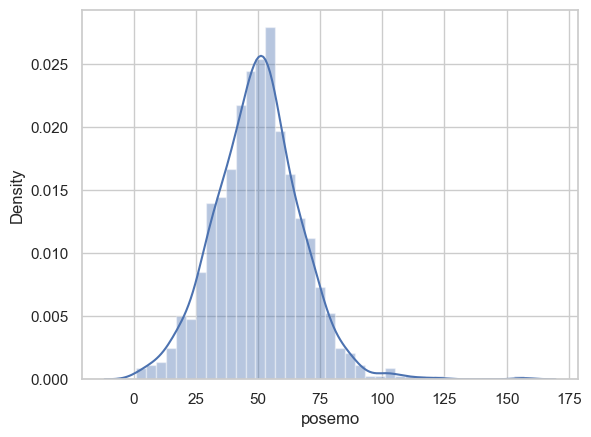

In [48]:
sns.distplot(intj_values)
plt.show()

In [13]:
# per item in the liwc_ array, create a dictionary with the category names as keys and the counts as values which has the maximum count

# liwc_dict = []
# for item in liwc_:
#     # for each item get the category with the maximum count
#     max_count = max(item, key=lambda x: x[1])
#     # get the index of the category with the maximum count
#     max_index = item.index(max_count)
#     # get the category name
#     max_category = category_names[max_index]
#     # create a dictionary with the category name as key and the count as value
#     liwc_dict.append({max_category: max_count[1]})
# liwc_dict



C:\Users\HP\AppData\Local\Temp\ipykernel_15384\2303836350.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(intj_values)


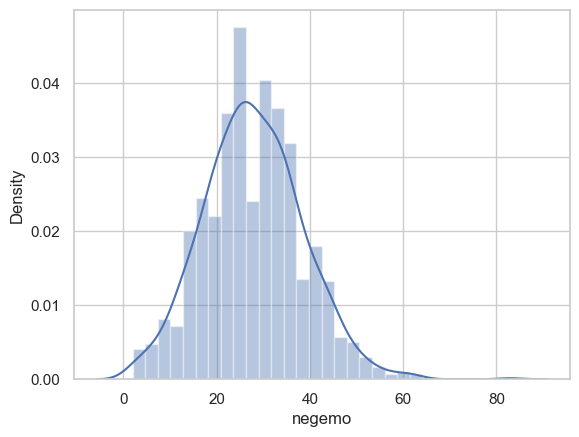

In [50]:
category_name = 'negemo'
# find all the affect values for type INTJ
intj_values = df_train[df_train['type'] == 'INTJ'][category_name]
sns.distplot(intj_values)
plt.show()

